# SOLUTION TO THE PROJECT TRAFFIC SIGN CLASSIFIER.


### Questions to be answered in this project following the rubric.
- 1)  Summary of the given dataset.
- 2)  Vizualization of the given dataset.
- 3)  What are the pre-porcessing techniques used and why?
- 4)  Summarize the train and test data setup, data augmentation methods.
- 5)  How does the final architecture of the setup look like, and why?. Give a visual feed.
- 6)  HOW WAS THE MODEL TRAINED, which optimizer is used and why, what is the batch size, number of epochs, and hyperparameters.
- 7)  What are the approaches followed towards a solution to the stated problem. How good is the final approach (based on the         percentage of accuracy).
- 8)  Test the model on five new German trafffic sign images from web.
- 9)  Is the model able to perform equally well on captured pictures or a live camera stream when compared to testing on the           dataset.
- 10) Use the model's softmax probabilities to visualize the certainty of its predictions, tf.nn.top_k could prove helpful here.       Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the             correct prediction appear in the top k? (k should be 5 at most)
- 11) If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired           images.

This project took me a lot more time, than that has been estimatedly given by staff at udacity. It is because I've taken time to taste every inch of the project. I read many blogs, research papers and also some CNN classification problems. Finally I have landed with 99.34% test accuracy, which is not really a bad one. 

I started dreaming of a network generalized for all types of images, like humans, animals, cars.....etc. Thanks to Udacity for helping me learn what I wanted to do.

### Steps followed sequentially during the exection of the classifier system:
#### Step 1: Data Exploration.
#### Step 2: Visualize the Data and Summarize the data.
#### Step 3: Design and Test a model Architecture.
#### Step 4: Test the model on new Images.
#### Step 5: Store the Model for future use.
#### Step 6: Summarize the entire solution.
#### Step 7: Acknowledgements and sources.

## Step 1 : Data Exploration:
First we need to familiarize ourselves with the dataset. This problem deals with the dataset of German Traffic Signs. During data exploration we need to see if the datasets are well balenced, because if they are no so, the model can get biased towards a class with higher number of images, which is to be avoided.

In [1]:
# import the required libraries and packages
import numpy as np
import tensorflow as tf
import cv2
import csv
import pickle
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec #check #http://matplotlib.org/users/gridspec.html
import os
import sys
#import time as time
import time
from datetime import timedelta
from timeit import default_timer as timer # check  #https://docs.python.org/2/library/timeit.html
import random
from sklearn.preprocessing import OneHotEncoder # check  #http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
#from sklearn.cross_validation import train_test_split, this is depricated in tensorflow 1.0 and used as .model_selection method.
from sklearn.model_selection import train_test_split
from PIL import Image as pimag
from IPython.display import Image as ipimag
from IPython.display import display as ipdis
import pandas as pd
#import prettytensor as pt # check # https://github.com/google/prettytensor
from sklearn.utils import shuffle
from scipy import ndimage
#from sklearn.metrics import confusion_matrix # check  #http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

# var init
indir = 'traffic_sign_data'
outdir = 'modelsol'
sess = tf.InteractiveSession() # check  #https://www.tensorflow.org/versions/r0.11/api_docs/python/client/session_management#InteractiveSession
SEED = 200
random.seed(SEED) # http://stackoverflow.com/questions/22639587/random-seed-what-does-it-do
np.random.seed(SEED)
tf.set_random_seed(SEED) # https://www.tensorflow.org/api_docs/python/tf/set_random_seed
%matplotlib inline

In [2]:
#  LOAD THE DATA # not to run this while training
def load_data(trainf,testf,valf,signf): 
    training_file  = indir +'/'+trainf
    testing_file   = indir +'/'+testf
    validation_file = indir +'/'+valf
    classnames_file = indir +'/'+signf

    classnames = []
    with open(classnames_file) as _f:
        rows = csv.reader(_f, delimiter=',')
        next(rows, None)  # skip the headers
        for i, row in enumerate(rows):
            assert(i==int(row[0]))
            classnames.append(row[1])
 
    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)
    with open(validation_file, mode='rb') as f:
        val = pickle.load(f)

    X_train, y_train = train['features'], train['labels']
    X_test, y_test   = test['features'], test['labels']
    X_val,y_val = val['features'],val['labels']
    
    
    X_train  = X_train.astype(np.float32)
    y_train  = y_train.astype(np.int32)
    X_test   = X_test.astype(np.float32)
    y_test   = y_test.astype(np.int32)
    X_val    = X_val.astype(np.float32)
    y_val    = y_val.astype(np.int32)
    
    return  classnames, X_train, y_train, X_test, y_test, X_val,y_val

In [3]:
# not to run this while training
classnames, train_images, train_labels, test_images, test_labels,valid_images,valid_labels = load_data(trainf='train.p',testf='test.p', valf='valid.p',signf='signnames.csv')
#test_images=X_test
#test_labels=y_test
#train_images =X_train
#train_labels =y_train
_,height,width,channel= train_images.shape
image_shape = (height,width,channel)
num_class = len(np.unique(train_labels))

print('shape of the given image in the dataset is :', height,width,channel)
print('number of classes :', num_class)
print('number of train images in given dataset :',len(train_labels))
print('number of test images in given dataset :',len(test_labels))
print('number of validation images in given dataset :',len(valid_labels))


shape of the given image in the dataset is : 32 32 3
number of classes : 43
number of train images in given dataset : 34799
number of test images in given dataset : 12630
number of validation images in given dataset : 4410


In [4]:
# memory run load decrease # run this for training
def load_data(testf,valf): 
    #training_file  = indir +'/'+trainf
    testing_file   = indir +'/'+testf
    validation_file = indir +'/'+valf
    #classnames_file = indir +'/'+signf
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)
    with open(validation_file, mode='rb') as f:
        val = pickle.load(f)

    #X_train, y_train = train['features'], train['labels']
    X_test, y_test   = test['features'], test['labels']
    X_val,y_val = val['features'],val['labels']
    X_test   = X_test.astype(np.float32)
    y_test   = y_test.astype(np.int32)
    X_val    = X_val.astype(np.float32)
    y_val    = y_val.astype(np.int32)
    
    return   X_test, y_test, X_val,y_val

In [5]:
#RUN DURING TRAINING TO REDUCE MERORY USAGE
test_images, test_labels,valid_images,valid_labels = load_data(testf='test.p', valf='valid.p')
#test_images=X_test
#test_labels=y_test
#train_images =X_train
#train_labels =y_train
_,height,width,channel= valid_images.shape
image_shape = (height,width,channel)
num_class = len(np.unique(valid_labels))

print('shape of the given image in the dataset is :', height,width,channel)
print('number of classes :', num_class)

shape of the given image in the dataset is : 32 32 3
number of classes : 43


In [6]:
def val_data(X_val, y_val, num_valid=3000): 
    # num_valid = num of validation samples     
    num   = len(y_val)   
    index = list(range(num))
    random.shuffle(index)
    valid_index=index[:num_valid]
    valid_images = X_val[valid_index] 
    valid_labels = y_val[valid_index]    
    return  valid_images, valid_labels
valid_images,valid_labels = val_data(valid_images,valid_labels)
print('Required number of validation samples =', len(valid_labels))


Required number of validation samples = 3000


In [7]:
def OHE(Y,classes):
    OHC = OneHotEncoder()    
    Yohc = OHC.fit(np.arange(classes).reshape(-1, 1))
    Ylabels = Yohc.transform(Y.reshape(-1, 1)).toarray()
    return Ylabels

In [8]:
X_train , y_train, X_test, y_test, X_val,y_val = train_images, train_labels, test_images, test_labels,valid_images,valid_labels

In [9]:
labels_train = OHE(y_train,43)
labels_test = OHE(y_test,43)

In [10]:
def check_OHE(cls,y):
    check = np.linalg.norm(np.argmax(cls,axis=1)-y)
    if check == 0:
        print('One hot encoding correct, ok to proceed')
    else:
        print('One hot encoding doesnt match the output, check code!!!')


In [11]:
check_OHE(labels_test,y_test)
check_OHE(labels_train,y_train)


One hot encoding correct, ok to proceed
One hot encoding correct, ok to proceed


Given: The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Now, we know that our dataset has 43 classes and train/test is approximately = 3, the image shape is 32x32x3.

## Step 2: Visualize and summarize the data


-  Q1) Visualize the given data.
-  Q2) Summarize the given data
- Answers to these questions are written in markdown cell after visualizing the data.

In [12]:
# Sorting the given train data in ascending order with labels as keys.
data = [[i,sum(y_train == i)] for i in range(43)]
data_sorted = sorted(data, key=lambda x: x[1])
sorted_data = [data_sorted[i][0] for i in range(len(data_sorted))]
print(sorted_data)

[0, 19, 37, 27, 32, 41, 42, 24, 29, 21, 39, 20, 40, 22, 36, 6, 16, 34, 30, 23, 28, 15, 26, 33, 14, 31, 17, 18, 35, 11, 3, 8, 7, 9, 25, 5, 4, 10, 38, 12, 13, 1, 2]


In [15]:
def insert_subimage(image, sub_image, y, x): 
    h, w, c = sub_image.shape
    image[y:y+h, x:x+w, :]=sub_image 
    return image
images, labels = X_train, y_train

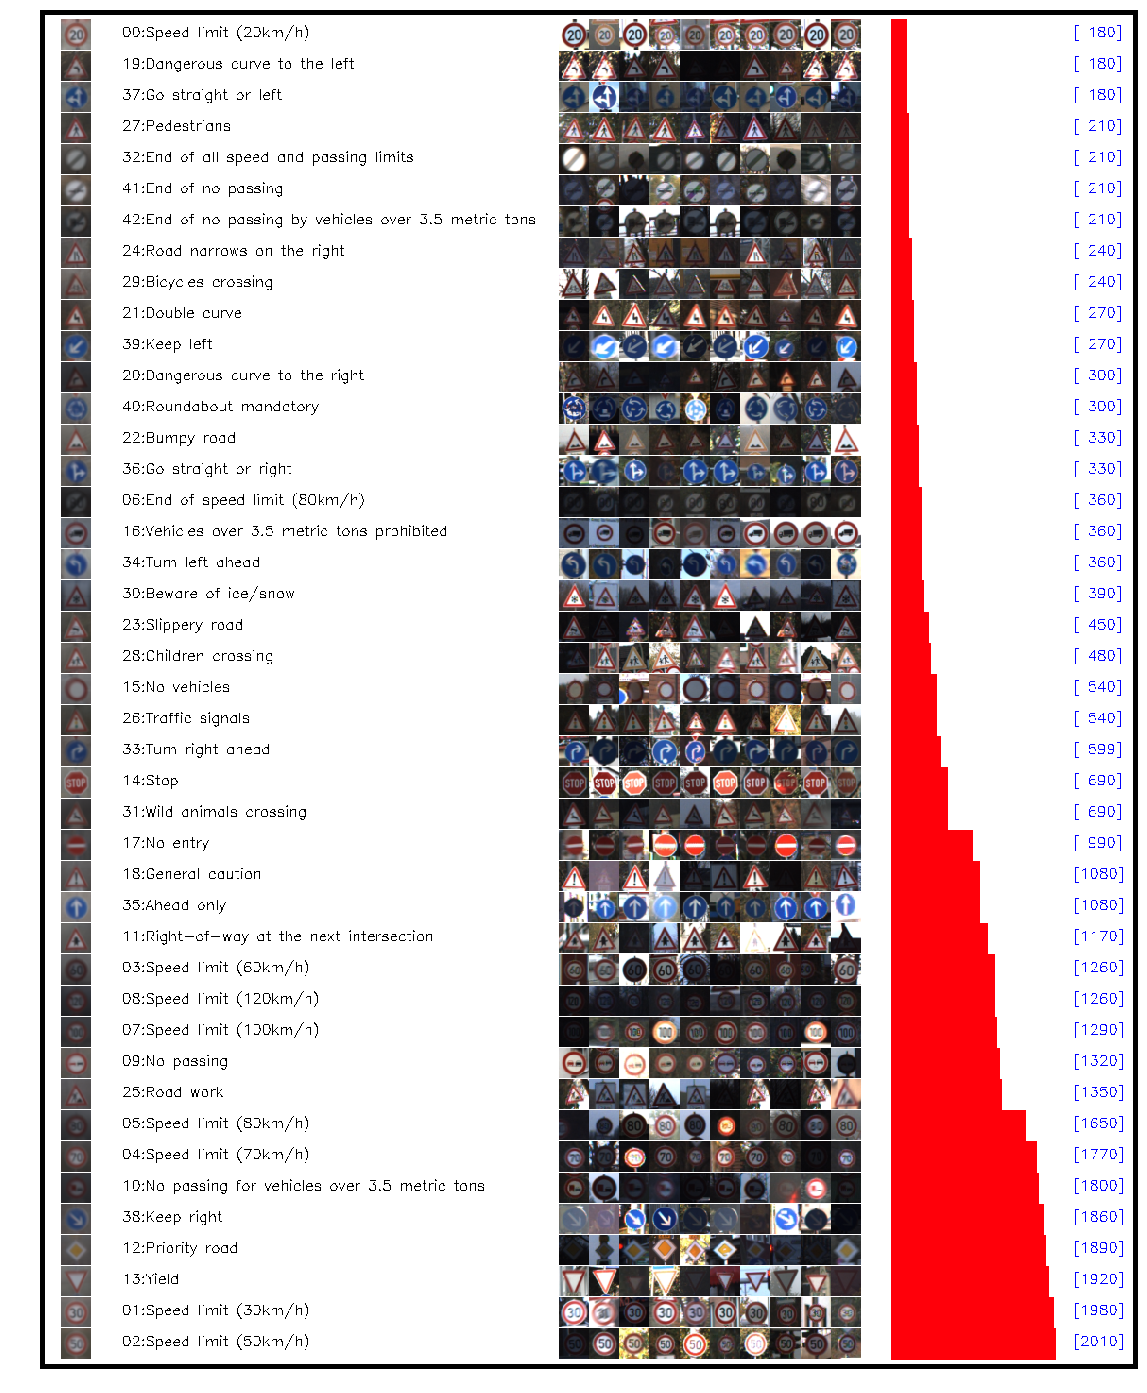

Column [1]: Mean image for the data set corresponding to the respective image label
Column [2]:Sign label and Sign name 
Column [3-12]:10 Sample images 
Column [13]: HISTOGRAM of entire train dataset
Column [14]: Number of images per class


In [16]:
# Visualizing the GIVEN train data.
# A helper function designed to plot the images.

#every sub image is drawn over canvas.
num_sample=10# number of sample images to show
#Create canvas with required shape
canvas = 255.*np.ones(shape=(10+num_class*(height+1),(num_sample+4+22)*width, channel),dtype=np.float32)
z=0
for c in sorted_data:
    #make mean images from the entire train data for all classes.
    idx = list(np.where(labels== c)[0])
    mean_image = np.average(images[idx], axis=0)
    insert_subimage(canvas, mean_image,5+ z*(height+1), width-15)# insert mean image


    #make random sample
    for n in range(num_sample):
        sample = images[np.random.choice(idx)]
        insert_subimage(canvas, sample, 5+z*(1+height), (7+num_sample+n)*width)

    #print summary
    count=len(idx)
    percentage = float(count)/float(len(images))
    cv2.putText(canvas, '%02d:%-6s'%(c, classnames[c]), ((3)*(width-5), int((z+.7)*(height+1))),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0),1)
    cv2.putText(canvas, '[%4d]'%(count), ((2+num_sample+22)*width, int((z+0.7)*(height+1))),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1)
    cv2.rectangle(canvas,((2+num_sample+16)*width, 5+z*(height+1)),((2+num_sample+16)*width + round(percentage*3000),5+ (z+1)*(1+height)),(255,0,10),-1)
    z+=1

# Save image to outdir
finished= cv2.copyMakeBorder(canvas,5,5,5,5,cv2.BORDER_CONSTANT,value=[0,0,0])
cv2.imwrite(outdir+'/train_data_summary.jpg',cv2.cvtColor(finished, cv2.COLOR_BGR2RGB))



plt.rcParams["figure.figsize"] = (25,25)
plt.imshow(finished.astype(np.uint8))
plt.axis('off') 
plt.show()

print('Column [1]: Mean image for the data set corresponding to the respective image label')
print('Column [2]:Sign label and Sign name ')
print('Column [3-12]:10 Sample images ')
print('Column [13]: HISTOGRAM of entire train dataset')
print('Column [14]: Number of images per class')

### Visualization Summary:
The mean images look fine for every class, so it might not be too difficult to train the classifier. By looking at the sample images it is clear that brightness is varied largley across the data which should be handled. It is also clear from the histogram that the number of images per class are not equal, so data augmentation is necessary. 



### Step 3 : Design and Test a model Architecture , Data Augmentation

- Q3) What are the pre-porcessing techniques used and why?
- Q4) Summarize the train and test data setup, data augmentation methods.

Answers to these questions are written along the proceess of design and testing the classifier. Below are six iterations on the training data to show how the parameters have been choosen.

### Architecture
My final architecture is in 3-stages: 
  1. Convolution Filter to absorb the impact of one of essesntial features to increase its softmax value: Color
  2. A step by step heirarchical network to detect lower level features, edges, shapes.
  3. Classification layer itself.

1. **FILTER**
  * The filter stage does-preprocessing on the data while training.
  * It is made by sequentially performing batch normalization, 3x3 convolution, prelu, 1x1 convolution, prelu.
  * Idea for pre-processing on the go is learnt from [evaluation of CNN by Dmytro Mishkin et al.]( https://arxiv.org/pdf/1606.02228.pdf ) 
  * A 3x3 convolution is used in the first step with strides of one in all dimensions to learn structure of the given image         along the three color channels, then a parametric relu followed by a 1x1 convolution and a parametric relu to decrease the       size of the params given as a input to next stage.
2. **Feature-extractor**
  * This stage is responsible for gaining information from images by learning features from it.
  * There are four primary blocks in this stage, the last three blocks are further divided to repetetive sub-blocks.
    * Each sub block comprises a closed loop BN layer, convolution, relu, dropout.
  * From the results of training data the number of repetitions are multiples of 3. So, the three sub blocks are designed as         follows 6-repetitions, 3-repitiotions, 3-repetitions.
3. **Classifier**
  * This last stage is made of a 1x1 covolution and  average global pooling.
  
This model reslted in a test accuracy of 99.34%

#### Data pre-processing

- The image is not converted to grayscale as COLOR is one important feature for traffic signs along with geometrics.
- Histogram equilization on the input image didnot bring improvement in training accuracy but lead to loss during validation.
- Initial normalization and stadardization did hurt the performance as well.
###### ** So, no pre-processing is done on the entire dataset at once, but only create new data that is like the transformed version of current for data augmentation. The data augmentation is done by transforming the images. Transformations are performed to change the orientation, to shift, to shear and to, enhance the image in terms of its brightness, contrast and saturation.**
- The above mentioned methods are only applied with a certain range, for example the image is rotated randomly only in the         range of roughly  +- 15. The idea of image flipping is also considered to be a good data augmentation technique(but all   the classes donot obey a single mirror plane, as the classes are based on geometrics of the image).

- Q5)  How does the final architecture of the setup look like, and why?. Give a visual feed.
- Q6)  HOW WAS THE MODEL TRAINED, which optimizer is used and why, what is the batch size, number of epochs and hyperparameters.

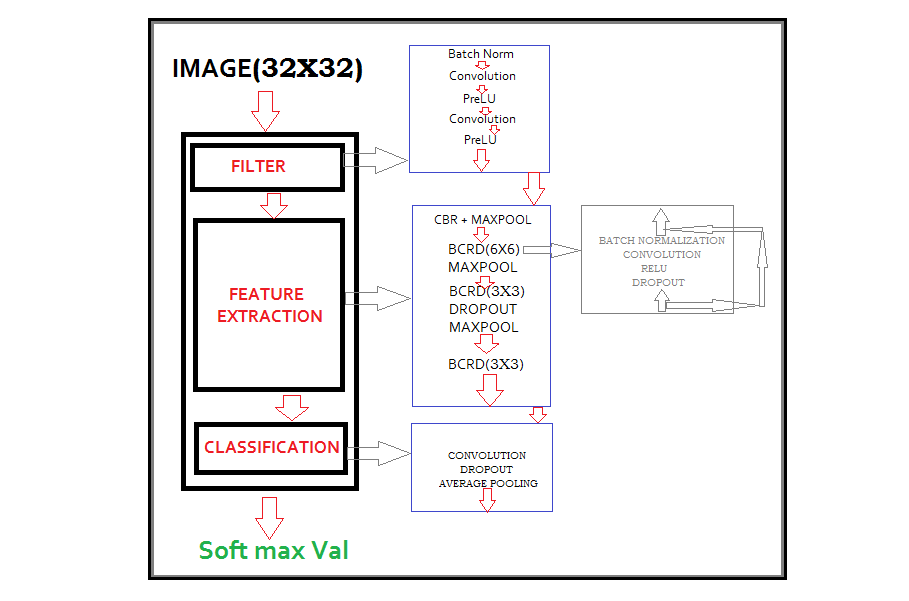

In [17]:
ipimag(filename= outdir+'/arch.png') 

The basic idea is to create argumented train data by generating new data during the training epoch. We think that if the train data is always changing, the network will be less prone to overfitting. But we have to make sure that the data change is not too big which will otherwise cause "jumps" in the training loss.
 
Hence, we divide the training epoches into R runs. For each run, we generate new data by the formula:
    "train_data_of_current_run = 20% of original_data + 80% of new_augmented_data" 

Then, in each run, we have to decide E number of epoch to execute. From our experiments, it turns out that R=40 and E=40 work well. Total number of training epoches is about 40x40 = 1600. 

To prevent imbalance class problem, we use equal number of samples per class by random sampling during augmentation as mentioned above. We use 3000 samples per class. 

For optimizer, we use stochastic gradient descent (sgd) with momentum=0.9. The learning rate is stepped from 0.1, 0.01, 0.001, 0.0001 at rounds 0, 3, 6, 8 respectively. Batch size should be preferably greater than the number of class (43) and we choose to use batch size = 128.

Finally we achieve 99.34% on the test set. We note that due to different random seed, the results is not exactly the same when we run our code.

- Q7) What are the approaches followed towards a solution to the stated problem. How good is the final approach (based on the         percentage of accuracy).

(1) Establish a target accuracy we want to achive. From searching Google, we know that:
    - human performance: 98.84%
    - industrial performance: 99.82%
    - works by others: 99.10% to 99.67%
    Hence we think that a reasonable well trained system should be about 99.5% accuracy.

(2) Train a simple conv net to establish baseline results. Our experiments shows that
    - simple LeNet + no dropout + no augmentation: ~90%
    - simple LeNet + dropout + no augmentation: ~93%
    - simple LeNet + dropout + augmentation: ~95%
    - simple LeNet + dropout + augmentation + preprocessing (whitening): ~97%
    
(Note: simple LeNet = 108_5x5conv_relu-maxpool, 108_5x5conv_relu-maxpool, 100_dense_relu, 100_dense_relu, 43_dense)

From these results, we think that data agumentation and preprocessing during training could be the key to get higher results. As for newtork structure, LeNet performance seems to be saturated. I have tried Vgg and Denset and decide to use Densenet as my final solution.



Based on the observations above, we try the following:

(1)  Select a network and tune it.

I choose "Densenet" becuase, I think it connect the lower layers to the top. But I did not do much experiments to see how important this is. i tried different number of concatentations, different number of kernels and dropput parameters. It is understood that the orginal "Densenet" is very sensitive to dropout (maybe because the dropout can propagate and get magnified within the block?).

(2)  Once we fix the network, choose pre-processing. Try whitening, LRN but find that they are quite slow and doesn't really imporve the results once we have large data argumentation. Hence we decide to got for something simpler, i.e. just include the preprocessing inside the network.

(3) Lastly we try different arugmentations. it is found that too much argumentation is no good. we need to limit to the correct rotation, scale, translate, perspective distrortion, brighness, contrast, satuation, etc. We note that final results is sensitive to argumentation. 

Finally was able achieve 99.34% on test set which is not too bad :)

In [18]:
# Define a function to show the class distributions when needed
def show_class_distribution(labels, title = None):
    unique = sorted(set(labels.tolist()))
    n_labels = len(unique)
    class_count = np.zeros([n_labels])
    for c in unique:
        class_count[c] = np.sum(labels == c)
    y_pos = np.arange(n_labels)
    plt.figure(figsize=(18, 5))
    plt.bar(unique, class_count)
    plt.xticks(y_pos)
    plt.ylabel('Classes Count')
    if title: plt.title(title)


In [19]:
# This part of code is borrowed from http://navoshta.com/traffic-signs-classification/
# Flipping the images to gain more train data.
def extend_data_by_flipping(images, labels):

    X=images
    y=labels

    # Classes of signs that, when flipped horizontally, should still be classified as the same class
    self_flippable_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
    # Classes of signs that, when flipped vertically, should still be classified as the same class
    self_flippable_vertically = np.array([1, 5, 12, 15, 17])
    # Classes of signs that, when flipped horizontally and then vertically, should still be classified as the same class
    self_flippable_both = np.array([32, 40])
    # Classes of signs that, when flipped horizontally, would still be meaningful, but should be classified as some other class
    cross_flippable = np.array([
        [19, 20],
        [33, 34],
        [36, 37],
        [38, 39],
        [20, 19],
        [34, 33],
        [37, 36],
        [39, 38],
    ])
    num_classes = 43

    X_extended = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype=np.float32)
    y_extended = np.empty([0], dtype=np.int32)

    for c in range(num_classes):
        # First copy existing data for this class
        X_extended = np.append(X_extended, X[y == c], axis=0)
        # If we can flip images of this class horizontally and they would still belong to said class...
        if c in self_flippable_horizontally:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X[y == c][:, :, ::-1, :], axis=0)
        # If we can flip images of this class horizontally and they would belong to other class...
        if c in cross_flippable[:, 0]:
            # ...Copy flipped images of that other class to the extended array.
            flip_class = cross_flippable[cross_flippable[:, 0] == c][0][1]
            X_extended = np.append(X_extended, X[y == flip_class][:, :, ::-1, :], axis=0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype=np.int32))

        # If we can flip images of this class vertically and they would still belong to said class...
        if c in self_flippable_vertically:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, :, :], axis=0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype=np.int32))

        # If we can flip images of this class horizontally AND vertically and they would still belong to said class...
        if c in self_flippable_both:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, ::-1, :], axis=0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype=np.int32))

    extend_datas  = X_extended
    extend_labels = y_extended
    return (extend_datas, extend_labels)

In [20]:
def random_gaussian(img):
    sigma = np.random.choice([0.2,0.5,0.7,1])
    return ndimage.gaussian_filter(img, sigma=sigma)

def generate(image, k, ang_lim=15, scale_lim=0.1, translate_lim=3, distort_lim=4, Lux=0.7):
    u=np.random.uniform()
    contrast_a = np.array([[[0.299, 0.587, 0.114]]]) #rgb to gray (YCbCr) :  Y = 0.299R + 0.587G + 0.114B
    saturation_a = np.array([[[0.299, 0.587, 0.114]]]) #rgb to gray (YCbCr) :  Y = 0.299R + 0.587G + 0.114B
    if u>k :
        (W, H, C) = image.shape
        center = np.array([W / 2., H / 2.])
        ang = np.random.uniform(low=-1, high=1) * ang_lim/180. * math.pi
        sc = np.random.uniform(low=-1, high=1) * scale_lim + 1
        cc = sc*math.cos(ang)
        ss = sc*math.sin(ang)
        rot= np.array([[cc, ss],[-ss,cc]])
        trans = np.random.uniform(low=-1, high=1, size=(1,2)) * translate_lim
        noise = np.random.standard_normal(size=(4,2)) * distort_lim
        points1 = np.array([[0., 0.], [0., H], [W, H], [W, 0.]])
        points2 = np.matmul(points1-center, rot) + center  + trans

        #add perspective noise
        points2 = points2 + noise

        #http://milindapro.blogspot.jp/2015/05/opencv-filters-copymakeborder.html
        matrix  = cv2.getPerspectiveTransform(points1.astype(np.float32), points2.astype(np.float32)) 
        outcome = cv2.warpPerspective(image, matrix, (W, H), flags=cv2.INTER_LINEAR,borderMode=cv2.BORDER_REFLECT_101)
        
        #filter1: brightness 
        candel = 1.0 + Lux*random.uniform(-1, 1)
        outcome *= candel
        outcome = np.clip(outcome,0.,255.)
        pass
        #filter2: contrast
        candel = 1.0 + Lux*random.uniform(-1, 1)
        gray = outcome * contrast_a
        gray = (3.0 * (1.0 - candel) / gray.size) * np.sum(gray)
        outcome *= candel
        outcome += gray
        outcome = np.clip(outcome,0.,255.)
        pass
        #filter3: saturation
        candel = 1.0 + Lux*random.uniform(-1, 1)
        gray = outcome * saturation_a
        gray = np.sum(gray, axis=2, keepdims=True)
        gray *= (1.0 - candel)
        outcome *= candel
        outcome += gray
        outcome = np.clip(outcome,0.,255.)
        pass
        return outcome
    else:
        return random_gaussian(image)

# Note:
** Images are generated here and saved to a pickle file, and later used for training. But, that was a very bad idea to load a entire augmented data set during training, it resulted in Memory error many times though the accuracy was quite promising. From this experience I have learnt that it is always better to augment a batch of data that we like to train, but not necessarily augment the entire dataset priorly. **

** I choose to preserve original test data as mixing the data, then augmenting it, then splitting it may lead to leakages that is the network will be able to look into some of the test data during training, which is not a good method. So, The entire block of data generation after flipping it is not used in the network, but not removed from this book only to show how it can affect the entire solution.**

In [24]:
def load_augmented_data(X_train,X_test,y_train,y_test,X_val,y_val,signf): 
    X_train = outdir +'/'+X_train
    y_train = outdir +'/'+y_train
    X_test  = outdir +'/'+X_test
    y_test  = outdir +'/'+y_test
    X_val   = outdir +'/'+X_val
    y_val   = outdir +'/'+y_val    
    classnames_file = indir +'/'+signf

    classnames = []
    with open(classnames_file) as _f:
        rows = csv.reader(_f, delimiter=',')
        next(rows, None)  # skip the headers
        for i, row in enumerate(rows):
            assert(i==int(row[0]))
            classnames.append(row[1])
 
    X_train = pickle.load( open( X_train, "rb" ) )
    y_train = pickle.load( open( y_train, "rb" ) )
    X_test = pickle.load( open( X_test, "rb" ) )
    y_test = pickle.load( open( y_test, "rb" ) )
    X_val = pickle.load( open( X_val, "rb" ) )
    y_val = pickle.load( open( y_val, "rb" ) )
    
    
    X_train  = X_train.astype(np.float32)
    y_train  = y_train.astype(np.int32)
    X_test   = X_test.astype(np.float32)
    y_test   = y_test.astype(np.int32)
    X_val    = X_val.astype(np.float32)
    y_val    = y_val.astype(np.int32)
    
    return  classnames, X_train, y_train, X_test, y_test,X_val,y_val

In [25]:
classnames, X_train, y_train, X_test, y_test,X_val,y_val = load_augmented_data(X_train='X_train-org.p',X_test='X_test-org.p',y_train='y_train-org.p',y_test='y_test-org.p',X_val='X_val-org.p',y_val='y_val-org.p',signf='signnames.csv')
_,height,width,channel= X_train.shape
image_shape = (height,width,channel)
num_class = len(np.unique(y_train))

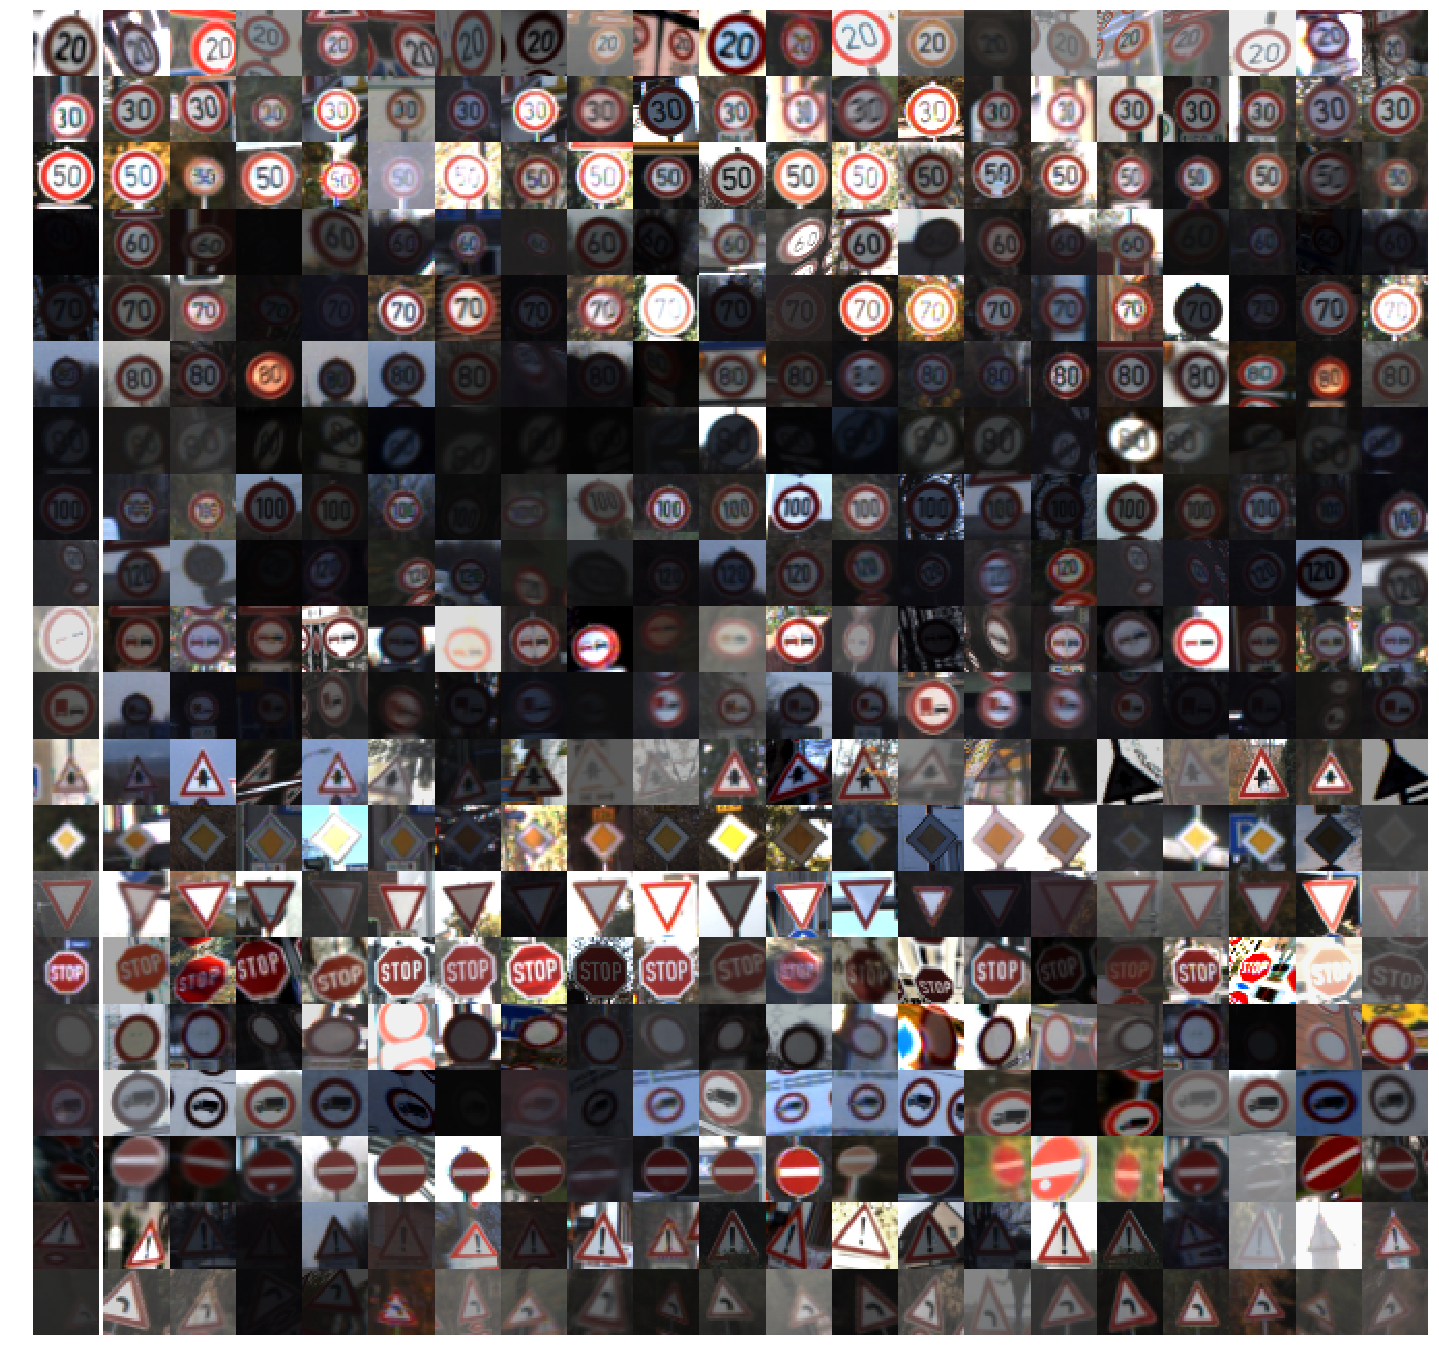

In [27]:
images, labels = X_train, y_train
#imageso, labelso = Xo_train, yo_train
num_train_flip = len(X_train)
num_sample = 20
perturbance_per_sample = 20

canvas = 255. * np.ones(shape=(num_sample * height, (perturbance_per_sample+1)* width+2, channel),dtype=np.float32)

for j in range(num_sample):
    i = random.randint(0, num_train_flip - 1)
    idx = list(np.where(labels== j)[0])
    #idxo = list(np.where(labelso==j)[0])

    image = images[np.random.choice(idx)]
    insert_subimage(canvas, image, j * height, 0)

    for k in range(0, perturbance_per_sample):
        t_image = images[np.random.choice(idx)]
        insert_subimage(canvas, t_image, j*height, (k+1)*width+2)

         
cv2.imwrite(outdir+'/data_transform.jpg',cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
plt.rcParams["figure.figsize"] = (25,25)
plt.imshow(canvas.astype(np.uint8))
plt.axis('off') 
plt.show()
    

# Note : Data augmentation is done on the go  :)

In [28]:
#releaving ram
X_train, y_train, X_val, y_val, X_test, y_test = 0,0,0,0,0,0

# .


In [29]:
TRAIN_PHASE = tf.placeholder(dtype=tf.bool, name='train_phase')

def convolution(input, num_kernels=1, kernel_size=(1,1), stride=[1,1,1,1], padding='SAME', bias=True, name='conv'):
    input_shape = input.get_shape().as_list()
    assert len(input_shape)==4    
    H = kernel_size[0]
    W = kernel_size[1]
    C = input_shape[3]    
    K = num_kernels
    weights = tf.get_variable(name=name+'_w', shape=[H, W, C, K], initializer=tf.truncated_normal_initializer(stddev=0.1))
    conv = tf.nn.conv2d(input, weights, strides=stride, padding=padding, name=name)
    if bias:
        bi = tf.get_variable(name=name + '_b', shape=[K], initializer=tf.constant_initializer(0.0))
        conv = conv+bi
    return conv

def relu(input, name='relu'):
    r = tf.nn.relu(input, name=name)
    return r

def prelu(input, name='prelu'):#https://arxiv.org/pdf/1502.01852.pdf
  alpha = tf.get_variable(name=name+'_a', shape=input.get_shape()[-1],initializer=tf.random_uniform_initializer(minval=0.1, maxval=0.3),dtype=tf.float32)
  pos = tf.nn.relu(input)
  neg = alpha * (input - abs(input)) * 0.5
  return pos + neg


def vlrelu(input, alpha=0.25, name='vlrelu'): #  alpha between 0.1 to 0.4
    act =tf.maximum(alpha*input,input)
    return act

def maxpool(input, kernel_size=(1,1), stride=[1,1,1,1], padding='SAME', has_bias=True, name='max' ):
    H = kernel_size[0]
    W = kernel_size[1]
    pool = tf.nn.max_pool(input, ksize=[1, H, W, 1], strides=stride, padding=padding, name=name)
    return pool

def avgpool(input, kernel_size=(1,1), stride=[1,1,1,1], padding='SAME', has_bias=True, global_pool=False, name='avg'):
    if global_pool==True:
        input_shape = input.get_shape().as_list()
        assert len(input_shape) == 4
        H = input_shape[1]
        W = input_shape[2]
        pool = tf.nn.avg_pool(input, ksize=[1, H, W, 1], strides=[1,H,W,1], padding='VALID', name=name)
        pool = flatten(pool)
    else:
        H = kernel_size[0]
        W = kernel_size[1]
        pool = tf.nn.avg_pool(input, ksize=[1, H, W, 1], strides=stride, padding=padding, name=name)
    return pool


def dropout(input, keep=1.0, name='drop'):
    drop = tf.cond(TRAIN_PHASE,lambda: tf.nn.dropout(input, keep),lambda: tf.nn.dropout(input, 1))
    return drop


def flatten(input, name='flat'):
    input_shape = input.get_shape().as_list()        
    dim   = np.prod(input_shape[1:])                 
    flat  = tf.reshape(input, [-1, dim], name=name)  
    return flat

def concat(input, name='cat'):
    cat = tf.concat(axis=3, values=input, name=name)
    return cat


def BN (input, decay=0.9, eps=1e-5, name='bn'):#http://r2rt.com/implementing-batch-normalization-in-tensorflow.html
    #http://ruishu.io/2016/12/27/batchnorm/
    with tf.variable_scope(name) as scope:
        bn = tf.cond(TRAIN_PHASE,lambda: tf.contrib.layers.batch_norm(input,decay=decay, epsilon=eps, center=True, scale=True,is_training=1,reuse=None,updates_collections=None, scope=scope),lambda: tf.contrib.layers.batch_norm(input, decay=decay, epsilon=eps, center=True, scale=True,is_training=0, reuse=True,updates_collections=None, scope=scope))
    return bn

In [30]:
def cbr(input, num_kernels=1, kernel_size=(1,1), stride=[1,1,1,1], padding='SAME', name='cbr'):
    with tf.variable_scope(name) as scope:
        block = convolution(input, num_kernels=num_kernels, kernel_size=kernel_size, stride=stride, padding=padding, bias=False)
        block = BN(block)
        block = relu(block)
    return block
def brc(input, num_kernels=1, kernel_size=(1, 1), stride=[1, 1, 1, 1], padding='SAME', name='brc'):
    with tf.variable_scope(name) as scope:
        block = BN(input)
        block = relu(block)
        block = convolution(block, num_kernels=num_kernels, kernel_size=kernel_size, stride=stride, padding=padding, bias=False)
    return block

def dense_bcrd(input,num_kernels=1, num=1,kernel_size=(1,1),drop=None,name='dense_bcrd'):
    block= input
    for n in range(num):
        with tf.variable_scope(name+'_%d'%n) as scope:
            conv = BN(block)
            conv = convolution(conv,num_kernels=num_kernels, kernel_size=kernel_size,stride=[1,1,1,1],padding='SAME', bias=False)
            conv = relu(conv)            
            if drop is not None:
                keep = (1-drop)**(1./num)
                conv = dropout(conv, keep=keep)
            block = concat((block,conv))
    return block

def Block( input_shape=(1,1,1), output_shape = (1)):

    H, W, C   = input_shape
    num_class = output_shape
    input     = tf.placeholder(shape=[None, H, W, C], dtype=tf.float32, name='input')
    
    # This initial convolution block acts as a color filter.
    with tf.variable_scope('preprocess') as scope:
        input = BN(input,name='b1')
        input = convolution(input, num_kernels=8, kernel_size=(3, 3), stride=[1, 1, 1, 1], padding='SAME', bias=True,name='c1')
        input = prelu(input,name='pr1')
        input = convolution(input, num_kernels=8, kernel_size=(1, 1), stride=[1, 1, 1, 1], padding='SAME', bias=True,name='c2')
        input = prelu(input,name='pr2')


    with tf.variable_scope('block1') as scope:
        block1 = cbr(input, num_kernels=32, kernel_size=(5, 5), stride=[1, 1, 1, 1], padding='SAME')
        block1 = maxpool(block1, kernel_size=(2,2), stride=[1, 2, 2, 1], padding='SAME')
    with tf.variable_scope('block2') as scope:
        block2 = dense_bcrd(block1, num=6, num_kernels=16, kernel_size=(3, 3), drop=None)
        block2 = maxpool(block2, kernel_size=(2, 2), stride=[1, 2, 2, 1], padding='SAME')

    with tf.variable_scope('block3') as scope:
        block3 = dense_bcrd(block2, num=3, num_kernels=24, kernel_size=(3, 3), drop=None)
        block3 = dropout(block3, keep=0.9)
        block3 = maxpool(block3,  kernel_size=(2,2), stride=[1, 2, 2, 1], padding='SAME')

    with tf.variable_scope('block4') as scope:
        block4 = dense_bcrd(block3, num=3, num_kernels=32, kernel_size=(3, 3), drop=None)
        block4 = cbr(block4, num_kernels=num_class, kernel_size=(1,1), stride=[1, 1, 1, 1], padding='SAME')
        block4 = dropout(block4, keep=0.9)
        block4 = avgpool(block4, global_pool=True)


    logit = block4
    return logit

In [31]:
def l2_reg(decay):
    variables = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
    for v in variables:
        name = v.name
        if 'w' in name:  #this is weight
            l2 = decay * tf.nn.l2_loss(v)
            tf.add_to_collection('losses', l2)
        elif 'b' in name:  #this is bias
            pass
        else:
            pass

    l2_loss = tf.add_n(tf.get_collection('losses'))
    return l2_loss

def cross_entropy(logit, label, name='cross_entropy'):
    label = tf.cast(label, tf.int64)
    cross_entropy = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logit, labels=label), name=name)
    return cross_entropy

def accuracy(prob, label, name='accuracy'):
    correct_prediction = tf.equal(tf.argmax(prob, 1), tf.cast(label, tf.int64))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name=name)
    return accuracy


In [32]:
Bigblock = Block 

logit  = Bigblock(input_shape =(height, width, channel), output_shape=(num_class))
data   = tf.get_default_graph().get_tensor_by_name('input:0')
label  = tf.placeholder(dtype=tf.int32, shape=[None])
prob   = tf.nn.softmax(logit)

l2     = l2_reg(decay=0.0005)
loss   = cross_entropy(logit, label)
metric = accuracy(prob, label)

In [33]:
# generate batches of images for training.
def generate_next_batch(datas, labels, n, batch_size):
    i = n*batch_size
    batch_datas  = datas [i:i+batch_size]
    batch_labels = labels[i:i+batch_size]
    return batch_datas, batch_labels
def shuffle_data_uniform(datas, labels, num_class, num_per_class=None):
    if num_per_class is None:
        max_count = 0
        for c in range(num_class):
            idx = list(np.where(labels == c)[0])
            count = len(idx)
            max_count = max(count, max_count)
        num_per_class = max_count

    index = []
    for c in range(num_class):
        idx = list(np.where(labels == c)[0])
        index = index + list(np.random.choice(idx, num_per_class))

    random.shuffle(index)
    shuffle_datas  = datas[index]
    shuffle_labels = labels[index]

    return shuffle_datas, shuffle_labels


In [34]:
# create a scheduler
def scheduler( r, steps=(0,100), items=(0.1,0.01)):
    item = items[0]
    N=len(steps)
    for n in range(N):
        if r >= steps[n]:
            item = items[n]
    return item


#for testing and validation
def test_network( datas, labels, batch_size, data, label, loss, metric, sess):
    num = len(datas)
    all_loss = 0
    all_acc = 0
    all = 0
    for n in range(0, num, batch_size):
        #print('\r  evaluating .... %d/%d' % (n, num), end='', flush=True)
        start = n
        end = start+batch_size if start+batch_size<=num else num
        batch_datas  = datas  [start:end]
        batch_labels = labels [start:end]

        fd = {data: batch_datas, label: batch_labels, TRAIN_PHASE : False}
        test_loss, test_acc = sess.run([loss, metric], feed_dict=fd)
        a = end-start
        all += a
        all_loss += a*test_loss
        all_acc  += a*test_acc
    assert(all==num)
    loss = all_loss/all
    acc  = all_acc/all
    return loss, acc


In [35]:
#flipping the original train data
train_images, train_labels = extend_data_by_flipping(train_images, train_labels)
num_train_flip = len(train_images)
print(num_train_flip)

59788


In [36]:
pickle.dump( train_images, open( "modelsol/X_train-estended.p", "wb" ) )
pickle.dump( train_labels, open( "modelsol/y_train-extended.p", "wb" ) )

In [37]:
# relieve ram
train_images, train_labels = 0,0

In [38]:
train_images = pickle.load( open( "modelsol/X_train-estended.p", "rb" ) )
train_labels = pickle.load( open( "modelsol/y_train-extended.p", "rb" ) )
print('length :', len(train_labels))

length : 59788


In [39]:
def create_images(images, keep):
    arguments = np.zeros(images.shape)
    for n in range(len(images)):
        arguments[n] = generate(images[n],k = keep)
    return arguments

In [17]:
keep = 0.20
num_per_class = 2000
num_class = 43
epoch_log  = 2 
max_run    = 48
batch_size = 64
steps = (0, 3, 6, 8)  
rates = (0.1, 0.01,  0.001, 0.0001) 
learning_rate = tf.placeholder(tf.float32, shape=[])
solver = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9)#https://www.tensorflow.org/api_docs/python/tf/train/MomentumOptimizer
solver_step = solver.minimize(loss+l2)

print ('start training')
sess.run(tf.global_variables_initializer(), feed_dict = {TRAIN_PHASE : True } )
saver  = tf.train.Saver()
# keep a log
print('')
print(' run  epoch   iter    rate      |  train_loss    (acc)     |  valid_loss    (acc)     |  time ')
print('----------------------------------------------------------------------------------------------')

tic = timer()
iter = 0
for r in range(max_run):
    rate = scheduler(r, steps=steps, items=rates)
    t_images, t_labels = shuffle_data_uniform(train_images, train_labels, num_class,  num_per_class=num_per_class)
    t_images = create_images(t_images, keep=keep)
    num_train = len(t_labels)
    N = max(num_train//batch_size-1,1)
    iter_log = max(round(float( epoch_log *num_train ) / float(batch_size)),1)
    for n in range(N):
        iter  = iter + 1
        run   = r + float(n)/float(N)
        epoch = float(iter*batch_size)/float(num_train)
        batch_datas, batch_labels = generate_next_batch( t_images, t_labels, n, batch_size )
        fd = {data: batch_datas, label: batch_labels, learning_rate: rate, TRAIN_PHASE : True }
        _, batch_loss, batch_acc, = sess.run([solver_step, loss, metric ],feed_dict=fd)      
        print('\r%4.1f  %5.1f   %05d   %f |  %f    (%f)  ' %(run, epoch, iter, rate, batch_loss, batch_acc), end='', flush=True)

        #Validation comes here
        if iter%iter_log==0 or (r==max_run-1 and n==N-1): 
            toc = timer()
            sec_pass = toc - tic
            min_pass = sec_pass/60.
            #validation check
            val_loss, val_acc =  test_network(valid_images, valid_labels, batch_size, data, label, loss, metric, sess)
            #print('\r')
            print('\r%4.1f  %5.1f   %05d   %f |  %f    (%f) |  %f    (%f) | %4.1f min' %(run, epoch, iter, rate, batch_loss, batch_acc, val_loss, val_acc, min_pass ), end='\n',flush=True)

        pass
# save final checkpoint
os.makedirs (outdir + '/check_points/final.ckpt',exist_ok=True)
saver.save(sess, outdir + '/check_points/final.ckpt')
print('\n') 
print('** evaluation on test set **' )
test_loss, test_acc = test_network(test_images, test_labels, batch_size, data, label, loss, metric, sess)
print('test_loss=%f    (test_acc=%f)' % ( test_loss, test_acc))
# used 2 dense in last dense cbr block

start training

 run  epoch   iter    rate      |  train_loss    (acc)     |  valid_loss    (acc)     |  time 
----------------------------------------------------------------------------------------------
 2.0    2.0   02688   0.100000 |  0.836468    (0.703125) |  0.183115    (0.950667) |  3.2 min
 4.0    4.0   05376   0.010000 |  0.140659    (0.953125) |  0.053743    (0.987333) |  6.1 min
 6.0    6.0   08064   0.001000 |  0.170993    (0.968750) |  0.055455    (0.989000) |  8.9 min
 8.0    8.0   10752   0.000100 |  0.118112    (0.984375) |  0.058236    (0.989000) | 11.7 min
10.0   10.0   13440   0.000100 |  0.080231    (0.984375) |  0.056025    (0.989333) | 14.6 min
12.0   12.0   16128   0.000100 |  0.236389    (0.953125) |  0.063145    (0.989333) | 17.4 min
14.0   14.0   18816   0.000100 |  0.068855    (0.984375) |  0.061061    (0.989333) | 20.1 min
16.0   16.0   21504   0.000100 |  0.027378    (1.000000) |  0.057811    (0.990000) | 22.9 min
18.0   18.0   24192   0.000100 |  0.189984

this was great but i plan to go deeper in the network to achieve more accuracy on the test dataset

In [15]:
keep = 0.20
num_per_class = 2000
num_class = 43
epoch_log  = 2 
max_run    = 48
batch_size = 64
steps = (0, 3, 6, 8)  
rates = (0.1, 0.01,  0.001, 0.0001) 
learning_rate = tf.placeholder(tf.float32, shape=[])
solver = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9)#https://www.tensorflow.org/api_docs/python/tf/train/MomentumOptimizer
solver_step = solver.minimize(loss+l2)

print ('start training')
sess.run(tf.global_variables_initializer(), feed_dict = {TRAIN_PHASE : True } )
saver  = tf.train.Saver()
# keep a log
print('')
print(' run  epoch   iter    rate      |  train_loss    (acc)     |  valid_loss    (acc)     |  time ')
print('----------------------------------------------------------------------------------------------')

tic = timer()
iter = 0
for r in range(max_run):
    rate = scheduler(r, steps=steps, items=rates)
    t_images, t_labels = shuffle_data_uniform(train_images, train_labels, num_class,  num_per_class=num_per_class)
    t_images = create_images(t_images, keep=keep)
    num_train = len(t_labels)
    N = max(num_train//batch_size-1,1)
    iter_log = max(round(float( epoch_log *num_train ) / float(batch_size)),1)
    for n in range(N):
        iter  = iter + 1
        run   = r + float(n)/float(N)
        epoch = float(iter*batch_size)/float(num_train)
        batch_datas, batch_labels = generate_next_batch( t_images, t_labels, n, batch_size )
        fd = {data: batch_datas, label: batch_labels, learning_rate: rate, TRAIN_PHASE : True }
        _, batch_loss, batch_acc, = sess.run([solver_step, loss, metric ],feed_dict=fd)      
        print('\r%4.1f  %5.1f   %05d   %f |  %f    (%f)  ' %(run, epoch, iter, rate, batch_loss, batch_acc), end='', flush=True)

        #Validation comes here
        if iter%iter_log==0 or (r==max_run-1 and n==N-1): 
            toc = timer()
            sec_pass = toc - tic
            min_pass = sec_pass/60.
            #validation check
            val_loss, val_acc =  test_network(valid_images, valid_labels, batch_size, data, label, loss, metric, sess)
            #print('\r')
            print('\r%4.1f  %5.1f   %05d   %f |  %f    (%f) |  %f    (%f) | %4.1f min' %(run, epoch, iter, rate, batch_loss, batch_acc, val_loss, val_acc, min_pass ), end='\n',flush=True)

        pass
# save final checkpoint
os.makedirs (outdir + '/check_points/final1.ckpt',exist_ok=True)
saver.save(sess, outdir + '/check_points/final.ckpt')
print('\n') 
print('** evaluation on test set **' )
test_loss, test_acc = test_network(test_images, test_labels, batch_size, data, label, loss, metric, sess)
print('test_loss=%f    (test_acc=%f)' % ( test_loss, test_acc))
# used 2,1,2

start training

 run  epoch   iter    rate      |  train_loss    (acc)     |  valid_loss    (acc)     |  time 
----------------------------------------------------------------------------------------------
 2.0    2.0   02688   0.100000 |  0.372089    (0.906250) |  0.146904    (0.962333) |  3.4 min
 4.0    4.0   05376   0.010000 |  0.102577    (0.968750) |  0.056514    (0.985333) |  6.5 min
 6.0    6.0   08064   0.001000 |  0.126630    (0.968750) |  0.052108    (0.987667) |  9.6 min
 8.0    8.0   10752   0.000100 |  0.099938    (0.968750) |  0.049233    (0.988667) | 12.6 min
10.0   10.0   13440   0.000100 |  0.170245    (0.968750) |  0.054239    (0.988667) | 15.6 min
12.0   12.0   16128   0.000100 |  0.050892    (0.984375) |  0.054884    (0.988333) | 18.6 min
14.0   14.0   18816   0.000100 |  0.173368    (0.937500) |  0.055531    (0.989000) | 21.6 min
16.0   16.0   21504   0.000100 |  0.124275    (0.968750) |  0.050757    (0.989000) | 24.6 min
18.0   18.0   24192   0.000100 |  0.174641

I still need to go deeper now

In [15]:
keep = 0.20
num_per_class = 2000
num_class = 43
epoch_log  = 2 
max_run    = 48
batch_size = 64
steps = (0, 3, 6, 8)  
rates = (0.1, 0.01,  0.001, 0.0001) 
learning_rate = tf.placeholder(tf.float32, shape=[])
solver = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9)#https://www.tensorflow.org/api_docs/python/tf/train/MomentumOptimizer
solver_step = solver.minimize(loss+l2)

print ('start training')
sess.run(tf.global_variables_initializer(), feed_dict = {TRAIN_PHASE : True } )
saver  = tf.train.Saver()
# keep a log
print('')
print(' run  epoch   iter    rate      |  train_loss    (acc)     |  valid_loss    (acc)     |  time ')
print('----------------------------------------------------------------------------------------------')

tic = timer()
iter = 0
for r in range(max_run):
    rate = scheduler(r, steps=steps, items=rates)
    t_images, t_labels = shuffle_data_uniform(train_images, train_labels, num_class,  num_per_class=num_per_class)
    t_images = create_images(t_images, keep=keep)
    num_train = len(t_labels)
    N = max(num_train//batch_size-1,1)
    iter_log = max(round(float( epoch_log *num_train ) / float(batch_size)),1)
    for n in range(N):
        iter  = iter + 1
        run   = r + float(n)/float(N)
        epoch = float(iter*batch_size)/float(num_train)
        batch_datas, batch_labels = generate_next_batch( t_images, t_labels, n, batch_size )
        fd = {data: batch_datas, label: batch_labels, learning_rate: rate, TRAIN_PHASE : True }
        _, batch_loss, batch_acc, = sess.run([solver_step, loss, metric ],feed_dict=fd)      
        print('\r%4.1f  %5.1f   %05d   %f |  %f    (%f)  ' %(run, epoch, iter, rate, batch_loss, batch_acc), end='', flush=True)

        #Validation comes here
        if iter%iter_log==0 or (r==max_run-1 and n==N-1): 
            toc = timer()
            sec_pass = toc - tic
            min_pass = sec_pass/60.
            #validation check
            val_loss, val_acc =  test_network(valid_images, valid_labels, batch_size, data, label, loss, metric, sess)
            #print('\r')
            print('\r%4.1f  %5.1f   %05d   %f |  %f    (%f) |  %f    (%f) | %4.1f min' %(run, epoch, iter, rate, batch_loss, batch_acc, val_loss, val_acc, min_pass ), end='\n',flush=True)

        pass
# save final checkpoint
os.makedirs (outdir + '/check_points/final1.ckpt',exist_ok=True)
saver.save(sess, outdir + '/check_points/final.ckpt')
print('\n') 
print('** evaluation on test set **' )
test_loss, test_acc = test_network(test_images, test_labels, batch_size, data, label, loss, metric, sess)
print('test_loss=%f    (test_acc=%f)' % ( test_loss, test_acc))
#used 4,2,1

start training

 run  epoch   iter    rate      |  train_loss    (acc)     |  valid_loss    (acc)     |  time 
----------------------------------------------------------------------------------------------
 2.0    2.0   02688   0.100000 |  0.262375    (0.937500) |  0.110768    (0.966667) |  4.2 min
 4.0    4.0   05376   0.010000 |  0.123218    (0.984375) |  0.016775    (0.993333) |  8.1 min
 6.0    6.0   08064   0.001000 |  0.112895    (0.968750) |  0.015737    (0.994000) | 11.9 min
 8.0    8.0   10752   0.000100 |  0.031512    (1.000000) |  0.012211    (0.995667) | 15.7 min
10.0   10.0   13440   0.000100 |  0.187783    (0.968750) |  0.014941    (0.993667) | 19.4 min
12.0   12.0   16128   0.000100 |  0.043341    (0.968750) |  0.014579    (0.994000) | 23.2 min
14.0   14.0   18816   0.000100 |  0.144079    (0.968750) |  0.014786    (0.994000) | 26.9 min
16.0   16.0   21504   0.000100 |  0.104258    (0.984375) |  0.011338    (0.995667) | 30.7 min
18.0   18.0   24192   0.000100 |  0.185518

going still deeper

In [16]:
keep = 0.20
num_per_class = 2000
num_class = 43
epoch_log  = 2 
max_run    = 48
batch_size = 64
steps = (0, 3, 6, 8)  
rates = (0.1, 0.01,  0.001, 0.0001) 
learning_rate = tf.placeholder(tf.float32, shape=[])
solver = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9)#https://www.tensorflow.org/api_docs/python/tf/train/MomentumOptimizer
solver_step = solver.minimize(loss+l2)

print ('start training')
sess.run(tf.global_variables_initializer(), feed_dict = {TRAIN_PHASE : True } )
saver  = tf.train.Saver()
# keep a log
print('')
print(' run  epoch   iter    rate      |  train_loss    (acc)     |  valid_loss    (acc)     |  time ')
print('----------------------------------------------------------------------------------------------')

tic = timer()
iter = 0
for r in range(max_run):
    rate = scheduler(r, steps=steps, items=rates)
    t_images, t_labels = shuffle_data_uniform(train_images, train_labels, num_class,  num_per_class=num_per_class)
    t_images = create_images(t_images, keep=keep)
    num_train = len(t_labels)
    N = max(num_train//batch_size-1,1)
    iter_log = max(round(float( epoch_log *num_train ) / float(batch_size)),1)
    for n in range(N):
        iter  = iter + 1
        run   = r + float(n)/float(N)
        epoch = float(iter*batch_size)/float(num_train)
        batch_datas, batch_labels = generate_next_batch( t_images, t_labels, n, batch_size )
        fd = {data: batch_datas, label: batch_labels, learning_rate: rate, TRAIN_PHASE : True }
        _, batch_loss, batch_acc, = sess.run([solver_step, loss, metric ],feed_dict=fd)      
        print('\r%4.1f  %5.1f   %05d   %f |  %f    (%f)  ' %(run, epoch, iter, rate, batch_loss, batch_acc), end='', flush=True)

        #Validation comes here
        if iter%iter_log==0 or (r==max_run-1 and n==N-1): 
            toc = timer()
            sec_pass = toc - tic
            min_pass = sec_pass/60.
            #validation check
            val_loss, val_acc =  test_network(valid_images, valid_labels, batch_size, data, label, loss, metric, sess)
            #print('\r')
            print('\r%4.1f  %5.1f   %05d   %f |  %f    (%f) |  %f    (%f) | %4.1f min' %(run, epoch, iter, rate, batch_loss, batch_acc, val_loss, val_acc, min_pass ), end='\n',flush=True)

        pass
# save final checkpoint
os.makedirs (outdir + '/check_point/final2.ckpt',exist_ok=True)
saver.save(sess, outdir + '/check_point/final2.ckpt')
print('\n') 
print('** evaluation on test set **' )
test_loss, test_acc = test_network(test_images, test_labels, batch_size, data, label, loss, metric, sess)
print('test_loss=%f    (test_acc=%f)' % ( test_loss, test_acc))
# used 4,4,4.

start training

 run  epoch   iter    rate      |  train_loss    (acc)     |  valid_loss    (acc)     |  time 
----------------------------------------------------------------------------------------------
 2.0    2.0   02688   0.100000 |  0.321849    (0.906250) |  0.197990    (0.937333) |  5.3 min
 4.0    4.0   05376   0.010000 |  0.064080    (0.984375) |  0.042704    (0.989333) | 10.3 min
 6.0    6.0   08064   0.001000 |  0.085070    (0.984375) |  0.032676    (0.991667) | 15.4 min
 8.0    8.0   10752   0.000100 |  0.041487    (0.984375) |  0.023284    (0.992000) | 20.3 min
10.0   10.0   13440   0.000100 |  0.259102    (0.953125) |  0.027953    (0.991000) | 25.2 min
12.0   12.0   16128   0.000100 |  0.006159    (1.000000) |  0.023852    (0.992333) | 30.0 min
14.0   14.0   18816   0.000100 |  0.071156    (0.984375) |  0.027940    (0.991333) | 37.0 min
16.0   16.0   21504   0.000100 |  0.088968    (0.968750) |  0.020666    (0.993333) | 50.3 min
18.0   18.0   24192   0.000100 |  0.123875

This mode decreased the accuracy

In [14]:
keep = 0.20
num_per_class = 3000
num_class = 43
epoch_log  = 2 
max_run    = 13
batch_size = 128
steps = (0, 3, 6, 8)  
rates = (0.1, 0.01,  0.001, 0.0001) 
learning_rate = tf.placeholder(tf.float32, shape=[])
solver = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9)#https://www.tensorflow.org/api_docs/python/tf/train/MomentumOptimizer
solver_step = solver.minimize(loss+l2)

print ('start training')
sess.run(tf.global_variables_initializer(), feed_dict = {TRAIN_PHASE : True } )
saver  = tf.train.Saver()
# keep a log
print('')
print(' run  epoch   iter    rate      |  train_loss    (acc)     |  valid_loss    (acc)     |  time ')
print('----------------------------------------------------------------------------------------------')

tic = timer()
iter = 0
for r in range(max_run):
    rate = scheduler(r, steps=steps, items=rates)
    t_images, t_labels = shuffle_data_uniform(train_images, train_labels, num_class,  num_per_class=num_per_class)
    t_images = create_images(t_images, keep=keep)
    num_train = len(t_labels)
    N = max(num_train//batch_size-1,1)
    iter_log = max(round(float( epoch_log *num_train ) / float(batch_size)),1)
    for n in range(N):
        iter  = iter + 1
        run   = r + float(n)/float(N)
        epoch = float(iter*batch_size)/float(num_train)
        batch_datas, batch_labels = generate_next_batch( t_images, t_labels, n, batch_size )
        fd = {data: batch_datas, label: batch_labels, learning_rate: rate, TRAIN_PHASE : True }
        _, batch_loss, batch_acc, = sess.run([solver_step, loss, metric ],feed_dict=fd)      
        print('\r%4.1f  %5.1f   %05d   %f |  %f    (%f)  ' %(run, epoch, iter, rate, batch_loss, batch_acc), end='', flush=True)

        #Validation comes here
        if iter%iter_log==0 or (r==max_run-1 and n==N-1): 
            toc = timer()
            sec_pass = toc - tic
            min_pass = sec_pass/60.
            #validation check
            val_loss, val_acc =  test_network(valid_images, valid_labels, batch_size, data, label, loss, metric, sess)
            #print('\r')
            print('\r%4.1f  %5.1f   %05d   %f |  %f    (%f) |  %f    (%f) | %4.1f min' %(run, epoch, iter, rate, batch_loss, batch_acc, val_loss, val_acc, min_pass ), end='\n',flush=True)

        pass
# save final checkpoint
os.makedirs (outdir + '/check_point_final/final.ckpt',exist_ok=True)
saver.save(sess, outdir + '/check_point_final/final.ckpt')
print('\n') 
print('** evaluation on test set **' )
test_loss, test_acc = test_network(test_images, test_labels, batch_size, data, label, loss, metric, sess)
print('test_loss=%f    (test_acc=%f)' % ( test_loss, test_acc))
#6,3,1

start training

 run  epoch   iter    rate      |  train_loss    (acc)     |  valid_loss    (acc)     |  time 
----------------------------------------------------------------------------------------------
 2.0    2.0   02016   0.100000 |  0.185436    (0.953125) |  0.072596    (0.979000) |  7.4 min
 4.0    4.0   04032   0.010000 |  0.041476    (0.992188) |  0.015219    (0.995000) | 14.3 min
 6.0    6.0   06048   0.001000 |  0.036518    (0.984375) |  0.018157    (0.995667) | 21.2 min
 8.0    8.0   08064   0.000100 |  0.062934    (0.968750) |  0.015676    (0.996667) | 28.1 min
10.0   10.0   10080   0.000100 |  0.011761    (1.000000) |  0.015267    (0.996333) | 35.3 min
12.0   12.0   12096   0.000100 |  0.041993    (0.984375) |  0.016746    (0.994667) | 42.4 min
13.0   13.0   13078   0.000100 |  0.068942    (0.984375) |  0.015404    (0.996000) | 45.2 min


** evaluation on test set **
test_loss=0.040981    (test_acc=0.988203)


this mode also decreased the accuracy, this may be caused by the rotation range in generatefunction , changing value from 20 to 15.

In [14]:
keep = 0.20
num_per_class = 3000
num_class = 43
epoch_log  = 2 
max_run    = 40
batch_size = 128
steps = (0, 3, 6, 8)  
rates = (0.1, 0.01,  0.001, 0.0001,0.00001) 
learning_rate = tf.placeholder(tf.float32, shape=[])
solver = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9)#https://www.tensorflow.org/api_docs/python/tf/train/MomentumOptimizer
solver_step = solver.minimize(loss+l2)

print ('start training')
sess.run(tf.global_variables_initializer(), feed_dict = {TRAIN_PHASE : True } )
saver  = tf.train.Saver()
# keep a log
print('')
print(' run  epoch   iter    rate      |  train_loss    (acc)     |  valid_loss    (acc)     |  time ')
print('----------------------------------------------------------------------------------------------')

tic = timer()
iter = 0
for r in range(max_run):
    rate = scheduler(r, steps=steps, items=rates)
    t_images, t_labels = shuffle_data_uniform(train_images, train_labels, num_class,  num_per_class=num_per_class)
    t_images = create_images(t_images, keep=keep)
    num_train = len(t_labels)
    N = max(num_train//batch_size-1,1)
    iter_log = max(round(float( epoch_log *num_train ) / float(batch_size)),1)
    for n in range(N):
        iter  = iter + 1
        run   = r + float(n)/float(N)
        epoch = float(iter*batch_size)/float(num_train)
        batch_datas, batch_labels = generate_next_batch( t_images, t_labels, n, batch_size )
        fd = {data: batch_datas, label: batch_labels, learning_rate: rate, TRAIN_PHASE : True }
        _, batch_loss, batch_acc, = sess.run([solver_step, loss, metric ],feed_dict=fd)      
        print('\r%4.1f  %5.1f   %05d   %f |  %f    (%f)  ' %(run, epoch, iter, rate, batch_loss, batch_acc), end='', flush=True)

        #Validation comes here
        if iter%iter_log==0 or (r==max_run-1 and n==N-1): 
            toc = timer()
            sec_pass = toc - tic
            min_pass = sec_pass/60.
            #validation check
            val_loss, val_acc =  test_network(valid_images, valid_labels, batch_size, data, label, loss, metric, sess)
            #print('\r')
            print('\r%4.1f  %5.1f   %05d   %f |  %f    (%f) |  %f    (%f) | %4.1f min' %(run, epoch, iter, rate, batch_loss, batch_acc, val_loss, val_acc, min_pass ), end='\n',flush=True)

        pass
# save final checkpoint
os.makedirs (outdir + '/check_point_2/final.ckpt',exist_ok=True)
saver.save(sess, outdir + '/check_point_2/final.ckpt')
print('\n') 
print('** evaluation on test set **' )
test_loss, test_acc = test_network(test_images, test_labels, batch_size, data, label, loss, metric, sess)
print('test_loss=%f    (test_acc=%f)' % ( test_loss, test_acc))

start training

 run  epoch   iter    rate      |  train_loss    (acc)     |  valid_loss    (acc)     |  time 
----------------------------------------------------------------------------------------------
 2.0    2.0   02016   0.100000 |  0.205189    (0.953125) |  0.071166    (0.979333) |  7.8 min
 4.0    4.0   04032   0.010000 |  0.016350    (1.000000) |  0.010347    (0.996333) | 15.0 min
 6.0    6.0   06048   0.001000 |  0.016092    (0.992188) |  0.008566    (0.997333) | 22.1 min
 8.0    8.0   08064   0.000100 |  0.080505    (0.968750) |  0.009094    (0.997333) | 29.4 min
10.0   10.0   10080   0.000100 |  0.006381    (1.000000) |  0.007912    (0.997333) | 36.6 min
12.0   12.0   12096   0.000100 |  0.059759    (0.984375) |  0.009183    (0.996333) | 43.7 min
14.0   14.0   14112   0.000100 |  0.066303    (0.976562) |  0.009628    (0.997333) | 50.9 min
16.0   16.0   16128   0.000100 |  0.026060    (0.992188) |  0.008728    (0.997333) | 58.3 min
18.0   18.0   18144   0.000100 |  0.030194

In [20]:
# number of images that have not been classified in test set properly = (1-0.99384)*(len(test set))
print('number of images not classified correctly in the test set: ',int((1-0.99384)*len(test_labels)))

number of images not classified correctly in the test set:  77


## Step 4: Store the Model for future use.

Now it is clear that the accuracy has increased by increasing the depth of the network, proportional to number of input channels. The accuracy can still be increased to a good amount with the same network by by increasing number of train images per class, which I will be doing in my next submission.
In my view a new netwrok with four networks running paralle,l in the first phase, with three of them acting as color filters for red, green and blue and one for the entire image may lead to higher accuracy. 

The model has been stored with various hyper-test-paremeters and the final one is stored in check_points_2/fial.ckpt file.
This model can be called later for testing on new images.

## Step 5: Test the model on new images.

- Q8)  Test the model on five new German trafffic sign images from web.
- Q9)  Is the model able to perform equally well on captured pictures or a live camera stream when compared to testing on the           dataset.
- Q10) Use the model's softmax probabilities to visualize the certainty of its predictions, tf.nn.top_k could prove helpful            here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does          the correct prediction appear in the top k? (k should be 5 at most)
- Q11) If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired           images.

Images were downloaded from web and resized initially, then they are pickled to a file with name DATA.p. Pickling the images helps in reading them continuously and smoothly.

In [26]:
test_label= [2,1,13,14,25]
crops = pickle.load( open( "traffic_sign_data/down.p", "rb" ) )
new_images= crops
# load trained classifier
saver  = tf.train.Saver()
saver.restore(sess, outdir + '/check_point_2/final.ckpt')

print('** test on extra **')
fd = {data: new_images, TRAIN_PHASE: False}
test_prob = sess.run(prob, feed_dict=fd)

#print('see printout of results in the next jupyter cell!')       
print('success')

** test on extra **
success


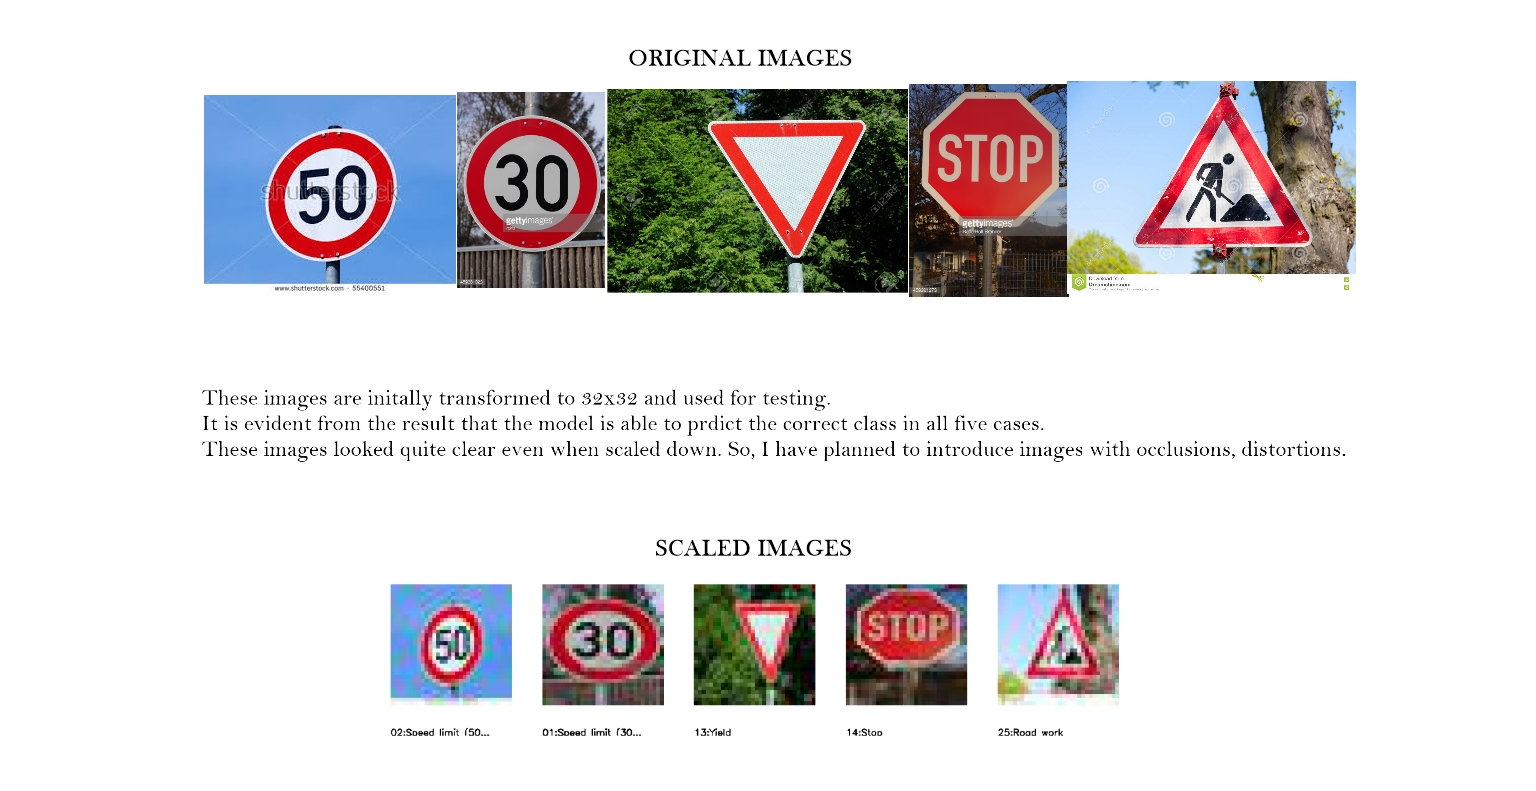

In [3]:
ipimag(filename= 'traffic_sign_data/test_data/TEST.jpg') 

n=0: true = 02:Speed limit (50km/h)
	top0: 0.999985  02:Speed limit (50km/h)
	top1: 0.000006  03:Speed limit (60km/h)
	top2: 0.000002  31:Wild animals crossing
	top3: 0.000001  05:Speed limit (80km/h)
	top4: 0.000001  10:No passing for vehicles over 3.5 metric tons

n=1: true = 01:Speed limit (30km/h)
	top0: 0.998494  01:Speed limit (30km/h)
	top1: 0.000890  02:Speed limit (50km/h)
	top2: 0.000186  04:Speed limit (70km/h)
	top3: 0.000064  41:End of no passing
	top4: 0.000032  40:Roundabout mandatory

n=2: true = 13:Yield
	top0: 0.999900  13:Yield
	top1: 0.000018  14:Stop
	top2: 0.000012  02:Speed limit (50km/h)
	top3: 0.000012  00:Speed limit (20km/h)
	top4: 0.000007  30:Beware of ice/snow

n=3: true = 14:Stop
	top0: 0.999977  14:Stop
	top1: 0.000003  22:Bumpy road
	top2: 0.000003  03:Speed limit (60km/h)
	top3: 0.000002  00:Speed limit (20km/h)
	top4: 0.000001  05:Speed limit (80km/h)

n=4: true = 25:Road work
	top0: 1.000000  25:Road work
	top1: 0.000000  29:Bicycles crossing
	top2: 

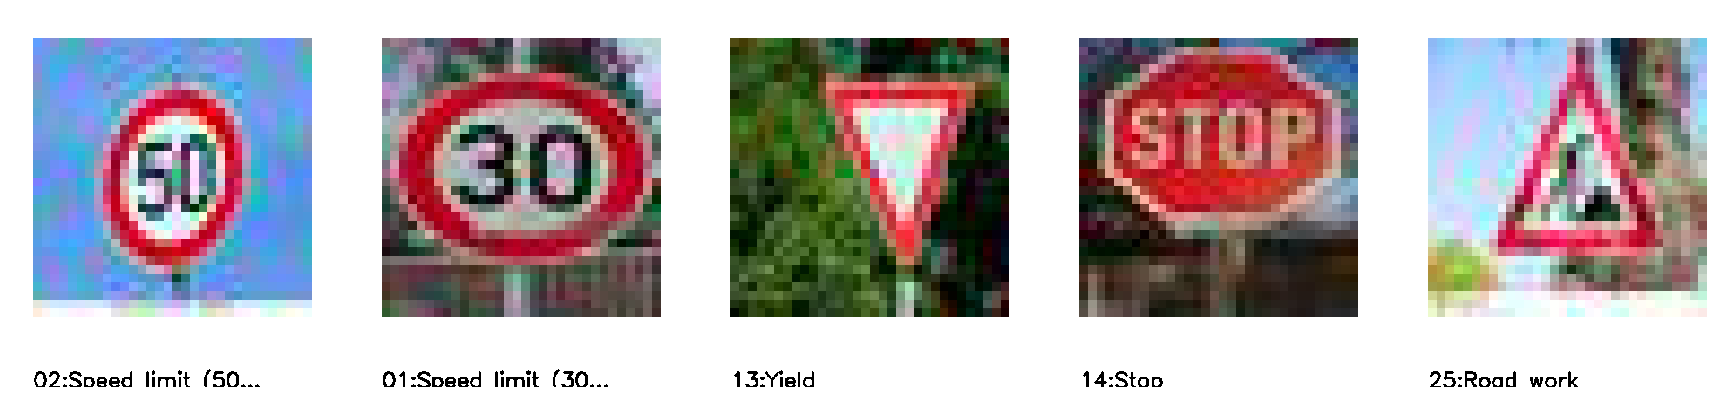

In [34]:
f=10
results_image = 255. * np.ones(shape=((height+400), 6*f*width, channel), dtype=np.float32)

num=5

for n in range(num):
    crop = crops[n] 
    c_hat=test_label[n]
    c_hat_label = classnames[c_hat] if c_hat>=0 else 'NIL'
    print('n=%d: true = %02d:%s' % (n, c_hat,c_hat_label))
    
    #crop = cv2.resize(crop, (0, 0), fx=f, fy=f, interpolation=cv2.INTER_NN)
    crop = crop.repeat(f, axis=0).repeat(f, axis=1)
    insert_subimage(results_image, crop, (height ), n*( f*height + f*8)) 
    cv2.putText(results_image, '%02d:%s%s' % (c_hat,c_hat_label[0:15], '...' if len(classnames[c_hat])>15 else ''), 
                ( n*( f*height + f*8), (height+400)), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
    

    p = test_prob[n]
    idx = np.argsort(p)[::-1]
    for k in range(5):
        c = int(idx[k])

        print('\ttop%d: %f  %02d:%s' % (k, p[c], c, classnames[c]))

    print('')
     

    
print('')
print('')    
print('**visual results**:  input, followed by top-5')
cv2.imwrite(outdir+'/extra_predictions.jpg', cv2.cvtColor(results_image, cv2.COLOR_BGR2RGB) )
plt.rcParams["figure.figsize"] = (30,30)
plt.imshow(results_image.astype(np.uint8))
plt.axis('off') 
plt.show()


In [19]:
test_label= [4,1,14,34,23,17]
crops = pickle.load( open( "traffic_sign_data/oc_test_data/dataset.p", "rb" ) )
new_images= crops
# load trained classifier
saver  = tf.train.Saver()
saver.restore(sess, outdir + '/check_point_2/final.ckpt')

print('** test on extra **')
fd = {data: new_images, TRAIN_PHASE: False}
test_prob = sess.run(prob, feed_dict=fd)

#print('see printout of results in the next jupyter cell!')       
print('success')

** test on extra **
success


n=0: true = 04:Speed limit (70km/h)
	top0: 0.652348  23:Slippery road
	top1: 0.115485  00:Speed limit (20km/h)
	top2: 0.081963  04:Speed limit (70km/h)
	top3: 0.036060  16:Vehicles over 3.5 metric tons prohibited
	top4: 0.021412  14:Stop

n=1: true = 01:Speed limit (30km/h)
	top0: 0.725937  01:Speed limit (30km/h)
	top1: 0.159609  40:Roundabout mandatory
	top2: 0.015755  05:Speed limit (80km/h)
	top3: 0.015626  02:Speed limit (50km/h)
	top4: 0.007343  14:Stop

n=2: true = 14:Stop
	top0: 0.923112  14:Stop
	top1: 0.024902  09:No passing
	top2: 0.020794  17:No entry
	top3: 0.004633  13:Yield
	top4: 0.004245  39:Keep left

n=3: true = 34:Turn left ahead
	top0: 0.683009  12:Priority road
	top1: 0.214227  40:Roundabout mandatory
	top2: 0.016747  37:Go straight or left
	top3: 0.014194  26:Traffic signals
	top4: 0.006569  33:Turn right ahead

n=4: true = 23:Slippery road
	top0: 0.926068  23:Slippery road
	top1: 0.027652  30:Beware of ice/snow
	top2: 0.007651  29:Bicycles crossing
	top3: 0.0049

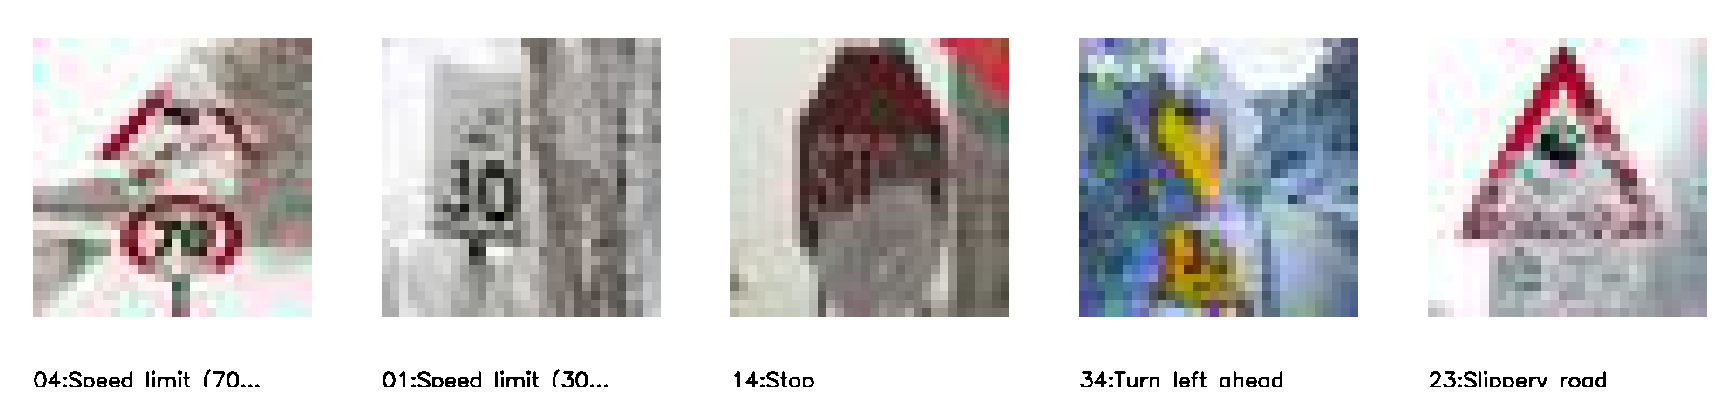

In [21]:
f=10
results_image = 255. * np.ones(shape=((height+400), 6*f*width, channel), dtype=np.float32)
num=5
for n in range(num):
    crop = crops[n] 
    c_hat=test_label[n]
    c_hat_label = classnames[c_hat] if c_hat>=0 else 'NIL'
    print('n=%d: true = %02d:%s' % (n, c_hat,c_hat_label))
    
    #crop = cv2.resize(crop, (0, 0), fx=f, fy=f, interpolation=cv2.INTER_NN)
    crop = crop.repeat(f, axis=0).repeat(f, axis=1)
    insert_subimage(results_image, crop, (height ), n*( f*height + f*8)) 
    cv2.putText(results_image, '%02d:%s%s' % (c_hat,c_hat_label[0:15], '...' if len(classnames[c_hat])>15 else ''), 
                ( n*( f*height + f*8), (height+400)), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
    

    p = test_prob[n]
    idx = np.argsort(p)[::-1]
    for k in range(5):
        c = int(idx[k])


        print('\ttop%d: %f  %02d:%s' % (k, p[c], c, classnames[c]))

    print('')
     

    
print('')
print('')    
cv2.imwrite(outdir+'/extra_predictions.jpg', cv2.cvtColor(results_image, cv2.COLOR_BGR2RGB) )
plt.rcParams["figure.figsize"] = (30,30)
plt.imshow(results_image.astype(np.uint8))
plt.axis('off') 
plt.show()

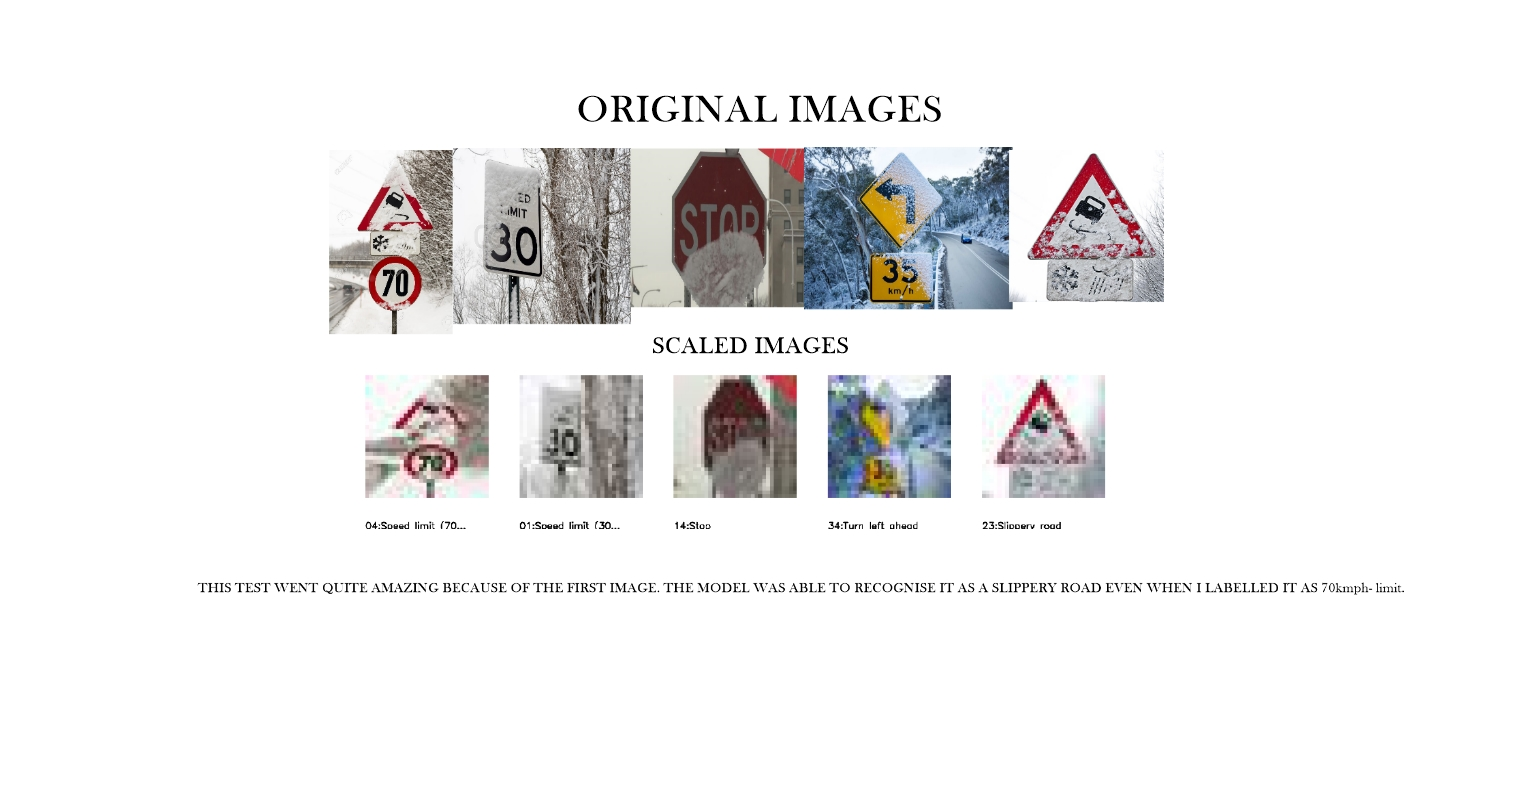

In [22]:
ipimag(filename= 'traffic_sign_data/test_data/DOWN/TEST.jpg') 


### Step 6: Summarize the entire solution.

#### Brief report on classification model:
The system had 1% less accuracy on training data due to high randomness in the transformation but worked well on the validation and test sets with over 99.34% accuracy. It also showed good results on new test set. In second test the first image was intentionally labelled 70kmph although it contained both slippary road image and 70kmph limit image, the classification model exceptionally performed resulting the slippary road label. This is not too bad for a classification system as the models predictions appear in top 5 classes


## Step 7: Acknowledgements:

Before writing this Deep net everything was new to me, I was a novice in all topics, but by doing this project I had a chance to explore lots of interseting and encouraging methods for deep learning. I also had a chance to explore lot of new problems that can be solved very accurately by using deep learning. I thank Udacity and my fellow Students for helping me in learning a lot. Now I can write my own Deep neural net and not only train it but also to find spots which need to be lokked into for increasing the accuracy. Data augmentation and Dense net are two methods that impressed me the most.
I felt that Dense Net is a closed loop control unit in DEEP NEURAL NETWORK.

LAST BLOCK
CADENCE IMPLEMENTATION: https://ip.cadence.com/uploads/901/TIP_WP_cnn_FINAL-pdf